# Filme in Cluster zusammenfassen

In [1]:
# wie zuvor importieren wir Pakete, die wir auf jeden Fall brauchen werden

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Datensatz laden
genre_data = pd.read_csv('workshop_movie_genres.csv')
genre_data = genre_data.fillna(0)
genre_data.head()

,title,year,imdb rating,rotten tomatoes rating,action,thriller,adventure,sci-fi or fantasy,crime,drama,black comedy,superhero,romance,psychological,mystery,martial arts,comedy,western,teen,war
0,Mad Max: Fury Road,2015,8.1,97,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Fast and Furious 7,2015,7.2,80,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fight Club,1999,8.8,79,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,The Dark Knight,2008,9.0,94,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Vanilla Sky,2001,6.9,42,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
genre_data.describe()

,year,imdb rating,rotten tomatoes rating,action,thriller,adventure,sci-fi or fantasy,crime,drama,black comedy,superhero,romance,psychological,mystery,martial arts,comedy,western,teen,war
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2001.541667,7.725000,80.875000,0.500000,0.208333,0.458333,0.291667,0.166667,0.458333,0.166667,0.166667,0.458333,0.041667,0.041667,0.041667,0.416667,0.041667,0.125000,0.083333
std,11.732449,0.878858,13.838549,0.510754,0.414851,0.508977,0.464306,0.380693,0.508977,0.380693,0.380693,0.508977,0.204124,0.204124,0.204124,0.503610,0.204124,0.337832,0.282330
min,1976.000000,5.200000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1996.750000,7.150000,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2000.500000,8.050000,82.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2012.500000,8.250000,92.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2017.000000,9.000000,97.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# Liste von allen Genrenamen aus den Spaltennamen erzeugen
genres = [i for i in genre_data.columns if i not in ['title', 'year', 'imdb rating', 'rotten tomatoes rating']]
X = genre_data[genres]

In [13]:
# Auch Kmeans ist in Sklearn enthalten!
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

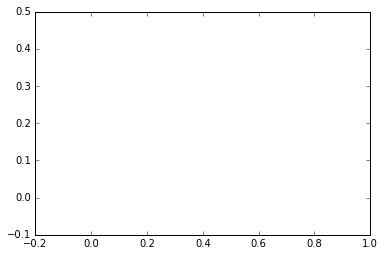

In [14]:
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)